In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
import sys
!{sys.executable} -m pip install git+https://github.com/mattbellis/h5hep.git


  Cloning https://github.com/mattbellis/h5hep.git to c:\users\dra\appdata\local\temp\pip-req-build-rh7ilmuj


  Running command git clone -q https://github.com/mattbellis/h5hep.git 'C:\Users\DRA\AppData\Local\Temp\pip-req-build-rh7ilmuj'
  fatal: unable to access 'https://github.com/mattbellis/h5hep.git/': Could not resolve host: github.com
ERROR: Command errored out with exit status 128: git clone -q https://github.com/mattbellis/h5hep.git 'C:\Users\DRA\AppData\Local\Temp\pip-req-build-rh7ilmuj' Check the logs for full command output.


In [3]:
import h5hep

In [4]:
!{sys.executable} -m pip install git+https://github.com/mattbellis/particle_physics_simplified.git

  Cloning https://github.com/mattbellis/particle_physics_simplified.git to c:\users\dra\appdata\local\temp\pip-req-build-5mquu5pm
  Created wheel for particle-physics-simplified: filename=particle_physics_simplified-0.9-py3-none-any.whl size=31568 sha256=c5acc9d488e7848850d2c9ebb369a52bf94a9b0e1ae30774d3d5614a7666818d
  Stored in directory: C:\Users\DRA\AppData\Local\Temp\pip-ephem-wheel-cache-962b1_56\wheels\10\27\d0\4e1011609053a20150b85dd0894a632814cba47d6f6e28d72f
Successfully built particle-physics-simplified


  Running command git clone -q https://github.com/mattbellis/particle_physics_simplified.git 'C:\Users\DRA\AppData\Local\Temp\pip-req-build-5mquu5pm'


In [5]:
import pps_tools as pps

ModuleNotFoundError: No module named 'plotly'

In [6]:
!{sys.executable} -m pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=2fe76d901838b4c52bd0f0b712c3e3e3461c1eb11cc7aac1bb45dfb9890459f5
  Stored in directory: c:\users\dra\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [7]:
import pps_tools as pps

In [9]:
#Downloading Data

In [10]:
pps.download_from_drive('dimuons_1000_collisions.hdf5')

INTERFACING WITH THE DATA

In [13]:
infile = 'data/dimuons_1000_collisions.hdf5'

collisions = pps.get_collisions(infile,experiment='CMS',verbose=False)
print(len(collisions), " collisions")  # This line is optional, and simply tells you how many events are in the file.


Building a simplified interface to the events...

Building the indices...
Built the indices!
Data is read in and input file is closed.
Reading in event  0
1000  collisions


In [14]:
#Collisions
second_collision = collisions[1]   # the second event
print("First event: ",second_collision)
all_muons = second_collision['muons']    # all of the jets in the first event
print("All muons: ",all_muons)
first_muon = all_muons[0]    # the first jet in the first event
print("First muon: ",first_muon)   
muon_energy = first_muon['e']      # the energy of the first photon
print("First muon's energy: ",muon_energy)

First event:  {'jets': [], 'muons': [{'e': 12.9435, 'px': 5.12579, 'py': -3.98369, 'pz': -11.1973, 'q': -1}, {'e': 11.8636, 'px': 4.78984, 'py': -6.26222, 'pz': -8.86434, 'q': 1}], 'electrons': [], 'photons': [], 'METx': 0.0, 'METy': 0.0}
All muons:  [{'e': 12.9435, 'px': 5.12579, 'py': -3.98369, 'pz': -11.1973, 'q': -1}, {'e': 11.8636, 'px': 4.78984, 'py': -6.26222, 'pz': -8.86434, 'q': 1}]
First muon:  {'e': 12.9435, 'px': 5.12579, 'py': -3.98369, 'pz': -11.1973, 'q': -1}
First muon's energy:  12.9435


In [16]:
energies = []

for collision in collisions:          # loops over all the events in the file
  muons = collision['muons']      # gets the list of all muons in the event
  
  for muon in muons:           # loops over each muon in the current event
    e = muon['e']                # gets the energy of the muon
    
    energies.append(e)             # puts the energy in a list


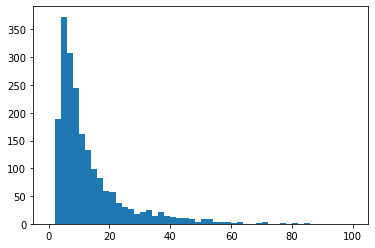

In [17]:
plt.hist(energies,bins=50,range=(0,100));

In [18]:
infile = 'data/dimuons_1000_collisions.hdf5' 

alldata = pps.get_all_data(infile,verbose=False)
nentries = pps.get_number_of_entries(alldata)

print("# entries: ",nentries)   # This optional line tells you how many events are in the file



Loading in the data...

Building the indices...
Built the indices!
Data is read in and input file is closed.
# entries:  1000


In [19]:
for entry in range(nentries):      # This range will loop over ALL of the events
    collision = pps.get_collision(alldata,entry_number=entry,experiment='CMS')

for entry in range(0,int(nentries/2)):     # This range will loop over the first half of the events
    collision = pps.get_collision(alldata,entry_number=entry,experiment='CMS')
    
for entry in range(int(nentries/2),nentries):      # This range will loop over the second half of the events
    collision = pps.get_collision(alldata,entry_number=entry,experiment='CMS')

In [20]:
energies = []

for event in range(0,int(nentries/3)):        # Loops over first 3rd of all events
  
  collision = pps.get_collision(alldata,entry_number=event,experiment='CMS')    # organizes the data so you can interface with it
  muons = collision['muons']         # gets the list of all photons in the current event
  
  for muon in muons:                 # loops over all photons in the event
    e = muon['e']                      # gets the energy of the photon
    
    energies.append(e)                   # adds the energy to a list

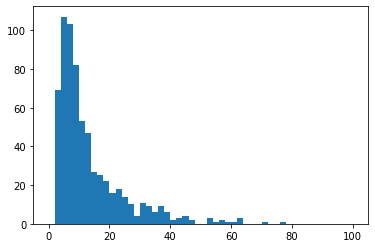

In [21]:
plt.hist(energies,bins=50,range=(0,100));